# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 

Question 1: "Are there any specific time of day/week/month/year that there is extraordinarily high demand of our bikes, where we might be loosing customers? What about low demand, when we should pull bikes out for maintenances?"

Question 2: "Where are our customers going? Do we need to move bikes in bulk from popular destinations to popular departures?"


> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [25]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [26]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        first_trip = next(trip_reader)
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [27]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    """
    
    duration = 0
    if city.upper() == 'WASHINGTON':
        duration = float(datum['Duration (ms)'])
        return duration/60000 # millisceonds to minutes
    else:
        duration = float(datum['tripduration'])
        return duration/60 # seconds to minutes
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [28]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    if city.upper() == 'CHICAGO':
        # convert trip start for Chicago
        dt_object = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
        month = int(dt_object.strftime('%m')) # month
        day = int(dt_object.strftime('%d')) # day
        year = int(dt_object.strftime('%Y')) # year
        hour = int(dt_object.strftime('%H')) # hour
        minute = int(dt_object.strftime('%M')) # minute
        day_of_week = dt_object.strftime('%A') # day of week
        
        return(month, hour, day_of_week)
    
    elif city.upper() == 'NYC':
        # convert trip start for NYC
        dt_object = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M:%S')
        month = int(dt_object.strftime('%m')) # month
        day = int(dt_object.strftime('%d')) # day
        year = int(dt_object.strftime('%Y')) # year
        hour = int(dt_object.strftime('%H')) # hour
        minute = int(dt_object.strftime('%M')) # minute
        day_of_week = dt_object.strftime('%A') # day of week
        
        return(month, hour, day_of_week)
        
    else: # City must be Washington
        dt_object = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')
        month = int(dt_object.strftime('%m')) # month
        day = int(dt_object.strftime('%d')) # day
        year = int(dt_object.strftime('%Y')) # year
        hour = int(dt_object.strftime('%H')) # hour
        minute = int(dt_object.strftime('%M')) # minute
        day_of_week = dt_object.strftime('%A') # day of week
        
        return(month, hour, day_of_week)
    



# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [29]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    if city.upper() == 'WASHINGTON':
        user_type = datum['Member Type']
        if user_type.upper() == 'REGISTERED':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
        return user_type
    else:
        user_type = datum['usertype']
        return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [30]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = time_of_trip(row, city)[0]
            new_point['hour'] = time_of_trip(row, city)[1]
            new_point['day_of_week'] = time_of_trip(row, city)[2]
            new_point['user_type'] = type_of_user(row, city)
            
            trip_writer.writerow(new_point)     
            

In [31]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by 
subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**:
* Most Trips: **NYC** had the most total trips with **276,798**
* Highest Subscriber: **NYC** had the highest percentage of trips by subscribers with **88.84%**
* Highest Short-term: **Chicago** had the highest percentage of trips by custoemrs with **23.77%**

In [32]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [33]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file = './data/Chicago-2016-Summary.csv'
print(number_of_trips(data_file))

# Chicago:    './data/Chicago-2016-Summary.csv'
# Washington: './data/Washington-2016-Summary.csv'
# NYC:        './data/NYC-2016-Summary.csv'


(54982, 17149, 72131)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: Replace this text with your reponse!

In [43]:
def trip_length_stat(input_csv):

    durations = []
    
    with open(input_csv, 'r') as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            durations.append(float(row['duration']))
    
    total_rides = len(durations)
    avg_duration = sum(durations) / total_rides
    
    # compute rides greater than 30 mins followed by proportion
    n_gt_30_mins = len([time for time in durations if time > 30])
    proportion_gt_30_mins = 100*n_gt_30_mins/total_rides

    return avg_duration, proportion_gt_30_mins


summary_files = ['./data/NYC-2016-Summary.csv',
                 './data/Chicago-2016-Summary.csv',
                 './data/Washington-2016-Summary.csv']

for file in summary_files:
    avg_trip_duration = trip_length_stat(file)[0]
    gt_30_mins = trip_length_stat(file)[1]
    city = file.split('-')[0].split('/')[-1]
    print('In {}, the average trip length is {:.2f} minutes.'.format(city,avg_trip_duration))
    print('In {}, the {:.2f}% of rides are longer than 30 minutes.'.format(city, gt_30_mins))

In NYC, the average trip length is 15.81 minutes.
In NYC, the 7.30% of rides are longer than 30 minutes.
In Chicago, the average trip length is 16.56 minutes.
In Chicago, the 8.33% of rides are longer than 30 minutes.
In Washington, the average trip length is 18.93 minutes.
In Washington, the 10.84% of rides are longer than 30 minutes.


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Replace this text with your response!

In [48]:
# (sort of) extension/modification of previous function
def trip_length_stat1(input_csv):
    
    dur = []
    dur_sub = []
    dur_cust = []
    
    with open(input_csv, 'r') as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            dur.append(float(row['duration']))
            if row['user_type'] == 'Subscriber':
                dur_sub.append(float(row['duration']))
            else:
                dur_cust.append(float(row['duration']))

    city = input_csv.split('-')[0].split('/')[-1]
    total_avg = sum(dur) / len(dur)
    subscriber_avg = sum(dur_sub) / len(dur_sub)
    customer_avg = sum(dur_cust) / len(dur_cust)
    
    return city, total_avg, subscriber_avg, customer_avg

city, avg_total, avg_subscriber, avg_customer = trip_length_stat1('./data/Chicago-2016-Summary.csv')
print("In {}, the overall average of all user types is: {:.2f} minutes. The average Subscriber trip in {} is {:.2f} minutes and the average " \
           "Customer trip duration is {:.2f} minutes.".format(city, avg_total, city, avg_subscriber, avg_customer))

In Chicago, the overall average of all user types is: 16.56 minutes. The average Subscriber trip in Chicago is 12.07 minutes and the average Customer trip duration is 30.98 minutes.


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

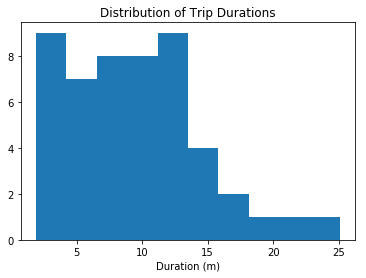

In [36]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

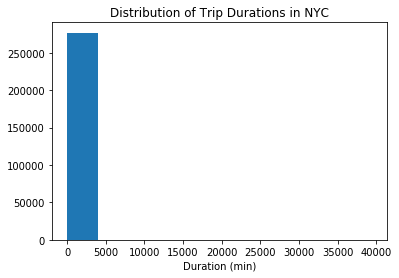

In [49]:
durations = []
input_csv = './data/NYC-2016-Summary.csv'

# read from input file
with open(input_csv, 'r') as f_in:
    reader = csv.DictReader(f_in)
    for row in reader:
        durations.append(float(row['duration']))

plt.hist(durations)
plt.title('Distribution of Trip Durations in NYC')
plt.xlabel('Duration (min)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: In Chicago, each group appears to be distributed with a normal curve, with subscribers considerably more pointed than customers. It is likely that subscribers who are likely more frequent users, are more keenly aware of their 30 minute overage charge that is not included in their subscription, and with more frequent use, have a better understanding of how far they can travel in 30 minutes before needing to return to the next bike station. Customers on the other hand, less familiar with the 30 minute rule, are spread out a bit more, and appear less concerned (although aware) of overages. With less frequent use, they are likely more carefree about one or two overage charges.

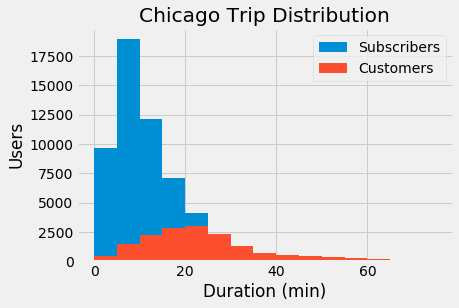

In [57]:
dur_sub = []
dur_cust = []
input_csv = './data/Chicago-2016-Summary.csv'


avg_ride_time, proportion_gt_30mins = trip_length_stat(input_csv)

# read from input file
with open(input_csv, 'r') as f_in:
    reader = csv.DictReader(f_in)
    for row in reader:
        if float(row['duration']) < 75:
            if row['user_type'] == 'Subscriber':
                dur_sub.append(float(row['duration']))
            else:
                dur_cust.append(float(row['duration']))

bins = [i for i in range(0,80,5)]

plt.style.use('fivethirtyeight')
plt.hist(dur_sub, bins,range=(0,75), label='Subscribers')
plt.hist(dur_cust, bins, range=(0,75), label='Customers')
plt.title('Chicago Trip Distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Users')

plt.legend()
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: The earlier distribution of Chicago subscribers and customers had me wondering about how much exactly in overage charges are being paid by the customers and subscribers. Additionally, how would that change if we adjusted some of the variables at play.

Since the given information only suggest that the base time of 30 minutes is included with each ride, but no further information is given, I made a couple of assumptions:

- There is no limit to how often a subscriber can park the bike at a station and then start a new ride. If there was, we would need more in depth information such as a customer ID and date stamp to calculate any overuse fees.
- The `base` amount of time is 30 minutes (as given). These graphs get interesting as this is changed (although it is fair to assume rider behavior would change as well).
- Riders are charged at a flat rate, where the pay an extra `amount` for every `interval` they go over the `base` amount of time. Changes to these numbers are also likely to impact rider behavior.
- I assigned the `amount` variable to a default of 1 and the `interval` variable to a default of 5, so that a rider is charged and extra $1 for every additional 5 minutes they ride. These variables can be adjusted at the top of the next cell.

When thinking about this question, I originally thought that the extra charges would be fairly close. While the distribution showed that customers are more likely to go over the 30 minute threshold, I still expected about a 40/60 split.

With about 80% of overage chages coming from customers, I was a bit shocked. I wanted to see the share of total ride time between customers and subscribers, so that led me to create a second pie chart. To see that the time spent on bikes is close to even, but the overage fees are mostly from customers, shows me that the two are very different groups of people, and are using the rental bikes for two very different reasons.

From a profitability standpoint, this seems to be good evidence that the City of Chicago should focus a bit more on targeting casual customers, as one or two time users will likely end up paying more in overage charges. However, this data alone is not enough to support that.

To take this another step forward, I would be interested to see what the costs of a subscription to a rental bike is, whether their are different tier subscriptions, and having some sort of `subscriber_id` field to get a better understanding of how many subscribers there are, how frequently they are using the bikes, and how much they might be saving compared to normal customers. With all of that together, we could also get a view into what type of customers are more profitable (or less costly). Another interesting field could be `bike_id` to get a more detailed view of the travel pattern of certain bikes, and what type of costs may be associated with moving bicycles from one location to another. Paired with information on maintenance cost (routine, corrective, etc.,) as well as initial purchase costs and expected lifecycle time, and any other information, we could begin to get a real clear view into the effectiveness of the ride-share program and it's costs/benefits to the users. Lastly, docking station data could give a great insight into the usage as well. There may be certain stations that are empty for long periods of time with no bikes to rent. Similarily, some stations may be full, leaving riders upset that their is no where for them to park.

Total extra charges are:  46919.0
Subscriber extra charges are:  9204.0
Customer extra charges are:  37715.0


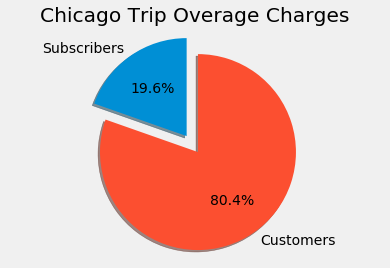

Total ride time in Chicago is:  1194751.0
Subscriber ride time in Chicago is:  663479.0
Customer ride time in Chicago is:  531272.0


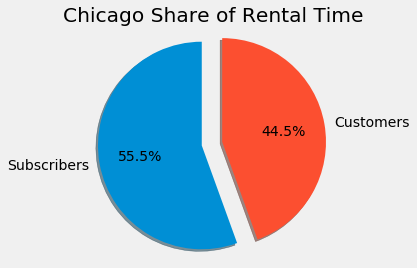

In [89]:
import matplotlib.pyplot as plt

base = 30 # base amount of time included in initial rental in minutes
amount = 1 # extra amount charged per interval over base time
interval = 5 # time interval before another amount is added to charge in minutes
input_csv = './data/Chicago-2016-Summary.csv'

sub_dur = []
cust_dur = []
total_dur = []
sub_charge = []
cust_charge = []
total_charge = []


def extra_charge(duration, base, amount, interval):
    t_over = duration - base
    if t_over % interval == 0:
        n_charges = (t_over/interval)*amount
    else:
        n_charges = (int(round(t_over/interval, 0)))*amount + amount
    return n_charges


with open(input_csv, 'r') as f_in:
    reader = csv.DictReader(f_in)
    bases = base
    amounts = amount
    intervals = interval
    for row in reader:
        dur = float(row['duration'])
        if dur < bases:
            total_charge.append(0)
            sub_charge.append(0)
            cust_charge.append(0)
            total_dur.append(float(row['duration']))
            if row['user_type'] == 'Subscriber':
                sub_dur.append(float(row['duration']))
            else:
                cust_dur.append(float(row['duration']))
        elif row['user_type'] == 'Subscriber':
            total_charge.append(extra_charge(float(row['duration']), bases, amounts, intervals))
            sub_charge.append(extra_charge(float(row['duration']), bases, amounts, intervals))
            cust_charge.append(0)
            total_dur.append(float(row['duration']))
            sub_dur.append(float(row['duration']))
        else:
            total_charge.append(extra_charge(float(row['duration']), bases, amounts, intervals))
            sub_charge.append(0)
            cust_charge.append(extra_charge(float(row['duration']), bases, amounts, intervals))
            total_dur.append(float(row['duration']))
            cust_dur.append(float(row['duration']))
    
total_extra_charges = sum(total_charge)
sub_extra_charges = sum(sub_charge)
cust_extra_charges = sum(cust_charge)
total_duration = sum(total_dur)
sub_duration = sum(sub_dur)
cust_duration = sum(cust_dur)

print('Total extra charges are: ', total_extra_charges)
print('Subscriber extra charges are: ', sub_extra_charges)
print('Customer extra charges are: ', cust_extra_charges)
    
labels = 'Subscribers', 'Customers'
sizes_1 = [(sub_extra_charges/total_extra_charges), (cust_extra_charges/total_extra_charges)]
sizes_2 = [(sub_duration/total_duration), (cust_duration/total_duration)]
explode = (0, 0.2)

plt.style.use('fivethirtyeight')
fig1, ax1 = plt.subplots()
ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90)
ax1.axis('equal')
plt.title('Chicago Trip Overage Charges')
plt.show()


print('Total ride time in Chicago is: ', round(total_duration, 0))
print('Subscriber ride time in Chicago is: ', round(sub_duration, 0))
print('Customer ride time in Chicago is: ', round(cust_duration, 0))


fig2, ax2 = plt.subplots()
ax2.pie(sizes_2, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90)
ax2.axis('equal')
plt.title('Chicago Share of Rental Time')
plt.show()



<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Any large dataset is a good dataset. At work, I would like to apply this to better serving our customer's needs and gaining a better understanding of market trends. We have access to a large amount of data where these techniques can be utilized.

On a personal level, I am in a fairly competitve fantasy football league. While there are tools out there at a cost, I would like to see how using large historical datasets of player statistics can help me when it comes to draft day, as well as setting my lineup and working the waiver wire. I created one predictive model and while it didn't serve me well in one league, of the 10 or so people I shared it with, they were all able to finish in the top tiers of their league, so I am looking forward to imporving for the next season.

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0